In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("baby.csv")
df.head()

,Unnamed: 0,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,0,120,284,27,62,100,False
1,1,113,282,33,64,135,False
2,2,128,279,28,64,115,True
3,3,108,282,23,67,125,True
4,4,136,286,25,62,93,False


In [4]:
newdf=df[["Birth Weight","Maternal Smoker"]]
newdf.head()

,Birth Weight,Maternal Smoker
0,120,False
1,113,False
2,128,True
3,108,True
4,136,False


In [21]:
smokers=newdf.loc[newdf["Maternal Smoker"]==True,["Birth Weight"]]
smokers

,Birth Weight
2,128
3,108
8,143
10,144
11,141
...,...
1162,143
1163,113
1164,109
1165,103


In [22]:
nonsmokers=newdf.loc[newdf["Maternal Smoker"]==False,["Birth Weight"]]
nonsmokers

,Birth Weight
0,120
1,113
4,136
5,138
6,132
...,...
1168,132
1169,113
1170,128
1172,125


In [23]:
import matplotlib.pyplot as plt

(array([ 1.,  0.,  1.,  1.,  1.,  0.,  1.,  2.,  1.,  3.,  2.,  3.,  4.,
         2.,  7.,  4.,  4., 10., 13., 20., 19., 19., 29., 44., 33., 36.,
        49., 32., 59., 35., 54., 31., 25., 40., 27., 20., 17., 11., 12.,
         7.,  7.,  6.,  6.,  3.,  3.,  3.,  1.,  2.,  1.,  4.]),
 array([ 55.  ,  57.42,  59.84,  62.26,  64.68,  67.1 ,  69.52,  71.94,
         74.36,  76.78,  79.2 ,  81.62,  84.04,  86.46,  88.88,  91.3 ,
         93.72,  96.14,  98.56, 100.98, 103.4 , 105.82, 108.24, 110.66,
        113.08, 115.5 , 117.92, 120.34, 122.76, 125.18, 127.6 , 130.02,
        132.44, 134.86, 137.28, 139.7 , 142.12, 144.54, 146.96, 149.38,
        151.8 , 154.22, 156.64, 159.06, 161.48, 163.9 , 166.32, 168.74,
        171.16, 173.58, 176.  ]),
 <BarContainer object of 50 artists>)

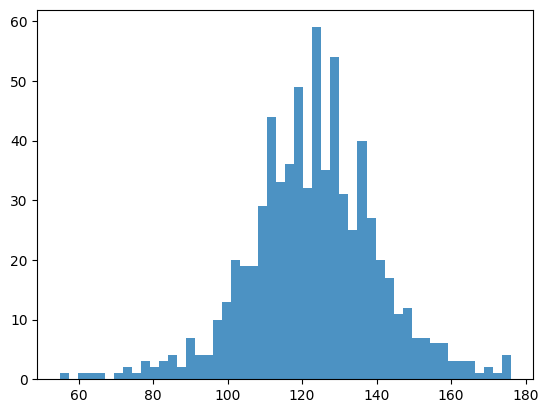

In [24]:
plt.hist(nonsmokers, alpha=0.8, label='Non-Smokers', bins=50)

array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

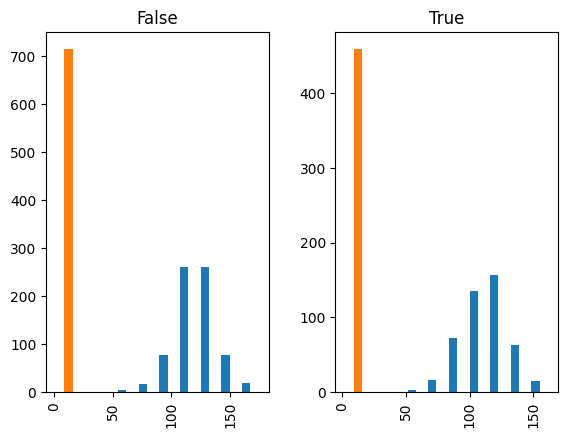

In [25]:
newdf.hist(by="Maternal Smoker")

array([[<Axes: title={'center': 'Birth Weight'}>]], dtype=object)

<Figure size 1000x600 with 0 Axes>

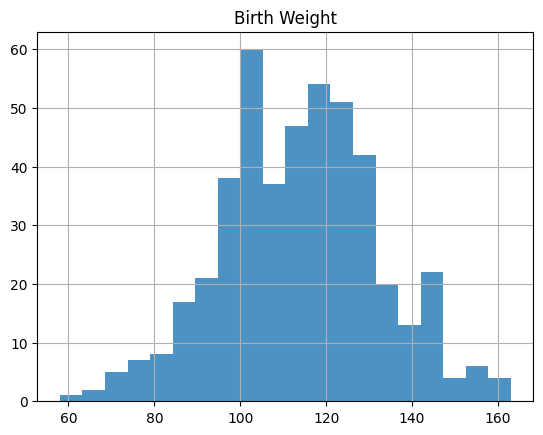

In [26]:
plt.figure(figsize=(10,6))

smokers.hist(alpha=0.8, bins=20, label='Smokers')


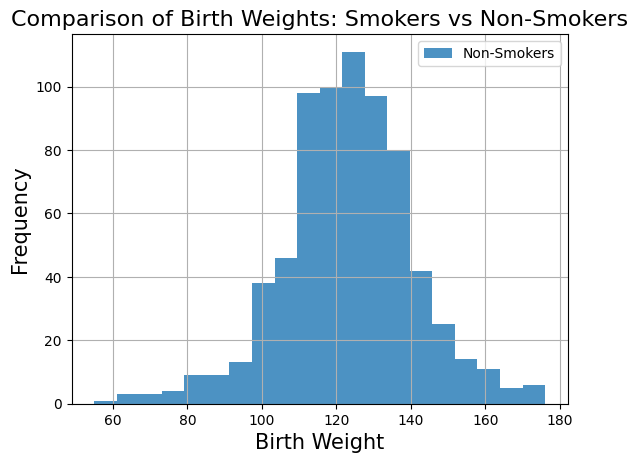

In [27]:
nonsmokers.hist(alpha=0.8, bins=20, label='Non-Smokers')

plt.xlabel('Birth Weight', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Comparison of Birth Weights: Smokers vs Non-Smokers', fontsize=16)
plt.legend()

plt.show()

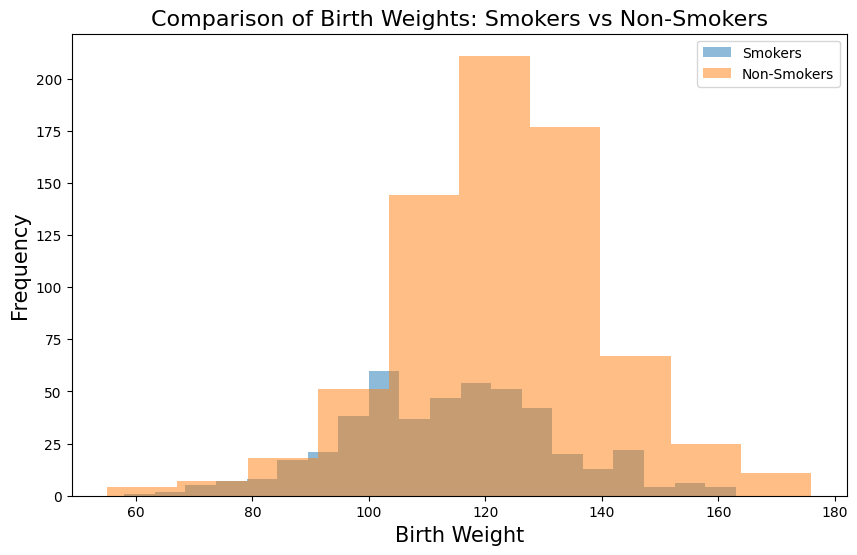

In [28]:
import matplotlib.pyplot as plt

# Create a figure
plt.figure(figsize=(10,6))

plt.hist(smokers, histtype='stepfilled', alpha=0.5, bins=20, label='Smokers')
plt.hist(nonsmokers, histtype='stepfilled', alpha=0.5, bins=10, label='Non-Smokers')

# Adding labels and title
plt.xlabel('Birth Weight', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Comparison of Birth Weights: Smokers vs Non-Smokers', fontsize=16)
plt.legend()

# Show the plot
plt.show()

In [30]:
mean_table=newdf.groupby("Maternal Smoker").mean()
mean_table

,Birth Weight
Maternal Smoker,
False,123.085315
True,113.819172


In [31]:
type(mean_table)

pandas.core.frame.DataFrame

In [34]:
observed_diff=mean_table['Birth Weight'][1] - mean_table['Birth Weight'][0]
observed_diff

C:\Users\HP\AppData\Local\Temp\ipykernel_50828\25932356.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  observed_diff=mean_table['Birth Weight'][1] - mean_table['Birth Weight'][0]


-9.266142572024918

In [35]:
shuffled = newdf.sample(1174,replace = False)
shuffled

,Birth Weight,Maternal Smoker
426,85,False
1049,131,True
1051,108,True
824,124,False
451,133,False
...,...,...
36,134,True
998,129,False
972,105,False
179,130,False


In [36]:
shuffled_weights = shuffled['Birth Weight']
type(shuffled_weights)

pandas.core.series.Series

In [37]:
original_and_shuffled= newdf.assign(shuffled_weights=shuffled_weights.values )


In [38]:
original_and_shuffled


,Birth Weight,Maternal Smoker,shuffled_weights
0,120,False,85
1,113,False,131
2,128,True,108
3,108,True,124
4,136,False,133
...,...,...,...
1169,113,False,134
1170,128,False,129
1171,130,True,105
1172,125,False,130


In [39]:
all_group_means= original_and_shuffled.groupby('Maternal Smoker').mean()
all_group_means

,Birth Weight,shuffled_weights
Maternal Smoker,,
False,123.085315,120.057343
True,113.819172,118.535948


In [40]:
difference = all_group_means['shuffled_weights'][0]- all_group_means['shuffled_weights'][1]
difference

C:\Users\HP\AppData\Local\Temp\ipykernel_50828\3793712676.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  difference = all_group_means['shuffled_weights'][0]- all_group_means['shuffled_weights'][1]


1.521394944924353

But could a different shuffle have resulted in a larger difference between the group average
To get a sense of the variability, simulate the difference many times.

# One simulation

In [47]:
smoking_and_birthweight = df[['Maternal Smoker', 'Birth Weight']]
shuffled = smoking_and_birthweight.sample(1174,replace = False)
shuffled_weights = shuffled['Birth Weight']
original_and_shuffled = smoking_and_birthweight.assign(shuffled_weights=shuffled_weights.values )
all_group_means= original_and_shuffled.groupby('Maternal Smoker').mean()
difference = all_group_means['shuffled_weights'][0]- all_group_means['shuffled_weights'][1]
difference

C:\Users\HP\AppData\Local\Temp\ipykernel_50828\2443773568.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  difference = all_group_means['shuffled_weights'][0]- all_group_means['shuffled_weights'][1]


-1.2008927891280905

# Permutation test

In [48]:
import numpy as np
import array
differences = np.zeros(5000)